# Images of Stairs

Classify images of a "stairs" pattern within 2x2 grayscale images.

### Importing necessary modules.

In [1]:
%matplotlib inline
%matplotlib notebook

import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings

warnings.filterwarnings("ignore")
sns.set()

### Take a look at the data

In [8]:
df.values.shape

(500, 6)

In [2]:
df = pd.read_csv('data/train.csv').append(pd.read_csv('data/test.csv'))
df.head()

,ImageId,R1C1,R1C2,R2C1,R2C2,IsStairs
0,1,252,4,155,175,1
1,2,175,10,186,200,1
2,3,82,131,230,100,0
3,4,115,138,80,88,0
4,5,27,60,194,238,0


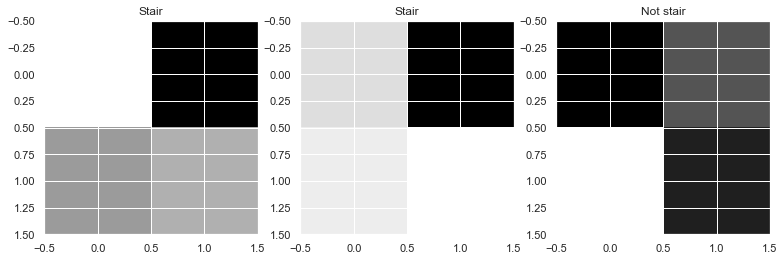

In [7]:
plt.figure(figsize=(13, 7))

for i in range(3):
    plt.subplot(130 + 1 + i)
    
    current_datapoint = df.values[i]
    
    plt.title('Stair' if current_datapoint[-1] == 1 else 'Not stair')
    
    img = current_datapoint[1:-1].reshape(2, 2)
    plt.imshow(img, cmap='gray');

### Preprocessing

In [9]:
from sklearn.model_selection import train_test_split


X = df.loc[:, ['R1C1', 'R1C2', 'R2C1', 'R2C2']].values
y = df.loc[:, 'IsStairs'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.15)

In [11]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler


class_encoder = OneHotEncoder()
data_scaler = MinMaxScaler()

X_train_scaled = data_scaler.fit_transform(X_train)
X_test_scaled = data_scaler.transform(X_test)
y_train_encoded = class_encoder.fit_transform(y_train.reshape(-1,1)).toarray()
y_test_encoded = class_encoder.transform(y_test.reshape(-1,1)).toarray()

### Building &amp; testing the model

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score


nn = MLPClassifier(max_iter=1000, random_state=2)
nn.fit(X_train_scaled, y_train_encoded)

train_cross_val_scores = cross_val_score(
    nn,
    X_train_scaled,
    y_train_encoded,
    n_jobs=-1, cv=3)
test_cross_val_scores = cross_val_score(
    nn,
    X_test_scaled,
    y_test_encoded,
    n_jobs=-1, cv=3)

print('Accuracy on train set:', np.round(np.mean(train_cross_val_scores), 3))
print('Accuracy on test set:', np.round(np.mean(test_cross_val_scores), 3))

Accuracy on train set: 0.965
Accuracy on test set: 0.947
